Возьмите любой временной ряд, содержащий не менее 100 значений и не менее 5
пропусков, или используйте один из временных рядов Банка России. Выполните
следующие задания:
Постройте график, визуализирующий временной ряд. Охарактеризуйте его,
присутствуют ли тренд, сезонность или цикл?

In [417]:
pip install pmdarima

In [418]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [419]:
df = pd.read_excel('Данные Банка России.xlsx')

In [420]:
n = 502
df = df[2:n]
print("Кол-во значений: " + str(df.shape[0]))
df

Кол-во значений: 500


,"Требования Банка России к кредитным организациям по кредитам (по оставшимся до погашения срокам), млн руб. (на начало дня)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,"Денежные средства кредитных организаций на корреспондентских счетах в Банке России (на начало операционного дня), млрд руб.",Unnamed: 9,"Сальдо операций Банка России по предоставлению /абсорбированию ликвидности, млрд руб."
2,2023-10-16 00:00:00,7411164.5,4301651.01,1112629.3,1675810.82,27380.98,43154.18,250538.22,9789,9509.3,5882.5
3,2023-10-13 00:00:00,7479860.57,6199261.06,2608.15,956313.53,27432.61,43265.49,250979.73,9995.4,9731.3,6048.1
4,2023-10-12 00:00:00,7317256.87,6191545.02,2638.69,801313.53,27394.98,43298.45,251066.19,9679.9,9413.3,5645.1
5,2023-10-11 00:00:00,1204392.68,828608.48,2684.12,51313.53,27267.75,43322.65,251196.15,2252.8,2036.2,-1922.1
6,2023-10-10 00:00:00,1159347.51,725514.86,2641.65,109368.62,27270.7,43342.99,251208.69,2496.7,2285.3,-1650.7
...,...,...,...,...,...,...,...,...,...,...,...
497,2021-10-13 00:00:00,724374.94,541222.2,20295.11,25762.91,18275.49,26101.97,92717.25,3627.5,3427.3,-1007
498,2021-10-12 00:00:00,674935.36,488917.91,22627.35,25508.1,18119.38,26545.57,93217.05,1765.1,1623.6,-2511.7
499,2021-10-11 00:00:00,435008.95,245480.71,26132.84,22046.79,21592.73,26547.09,93208.79,1999.9,1862.7,-2125.8
500,2021-10-08 00:00:00,474842.3,285463.8,26117.27,22084.77,21409.18,26516.75,93250.53,2747.9,2598.3,-1476.9


In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 2 to 501
Data columns (total 11 columns):
 #   Column                                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                                       --------------  ----- 
 0   Требования Банка России к кредитным организациям по кредитам (по оставшимся до погашения срокам), млн руб. (на начало дня)   500 non-null    object
 1   Unnamed: 1                                                                                                                   500 non-null    object
 2   Unnamed: 2                                                                                                                   500 non-null    object
 3   Unnamed: 3                                                                                                                   

In [422]:
df.rename(columns = {'Требования Банка России к кредитным организациям по кредитам (по оставшимся до погашения срокам), млн руб. (на начало дня)':'Дата', 'Unnamed: 1': 'Всего'}, inplace = True )
df['Дата'] = pd.to_datetime(df['Дата']) #преобразуем в формат, позволяющий работать с датами
df['Всего'] = pd.to_numeric(df['Всего'])
df.index = df['Дата']
del df['Дата']
df = df.drop(df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 9]], axis=1)
print(df)

                 Всего
Дата                  
2023-10-16  7411164.50
2023-10-13  7479860.57
2023-10-12  7317256.87
2023-10-11  1204392.68
2023-10-10  1159347.51
...                ...
2021-10-13   724374.94
2021-10-12   674935.36
2021-10-11   435008.95
2021-10-08   474842.30
2021-10-07   375084.12

[500 rows x 1 columns]


Text(0, 0.5, 'Всего')

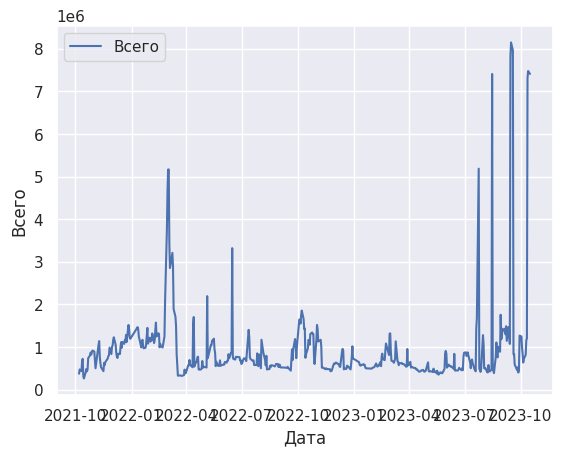

In [423]:
sns.lineplot(data=df) # визуализируем временной ряд
plt.ylabel('Всего')

In [424]:
from statsmodels.tsa.stattools import adfuller #Тест Дики — Фуллера на стационарность
adft = adfuller(df)

In [425]:
print('p-value: ', adft[1])

p-value:  0.04414917974768348


p-value < 0.05, отсюда следует, что ряд стационарный

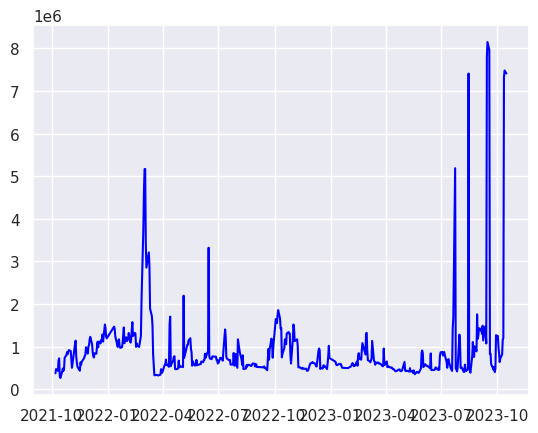

In [426]:
plt.plot(df['Всего'], color="blue",label="Исходные данные")

Постройте и опишите коррелограммы (графики автокорреляционной функции и
частной автокорреляционной функции) для временного ряда.

In [427]:
autocorrelation_lag1 = df['Всего'].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)
#коэффициент автокорреляции с лагом 1

One Month Lag:  0.6679850655119733


In [428]:
autocorrelation_lag3 = df['Всего'].autocorr(lag=3)#коэффициент автокорреляции с лагом 3
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = df['Всего'].autocorr(lag=6) #коэффициент автокорреляции с лагом 6
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = df['Всего'].autocorr(lag=9) #коэффициент автокорреляции с лагом 9
print("Nine Month Lag: ", autocorrelation_lag9)

Three Month Lag:  0.21888197328235362
Six Month Lag:  0.12057873253870828
Nine Month Lag:  0.08145251918100924


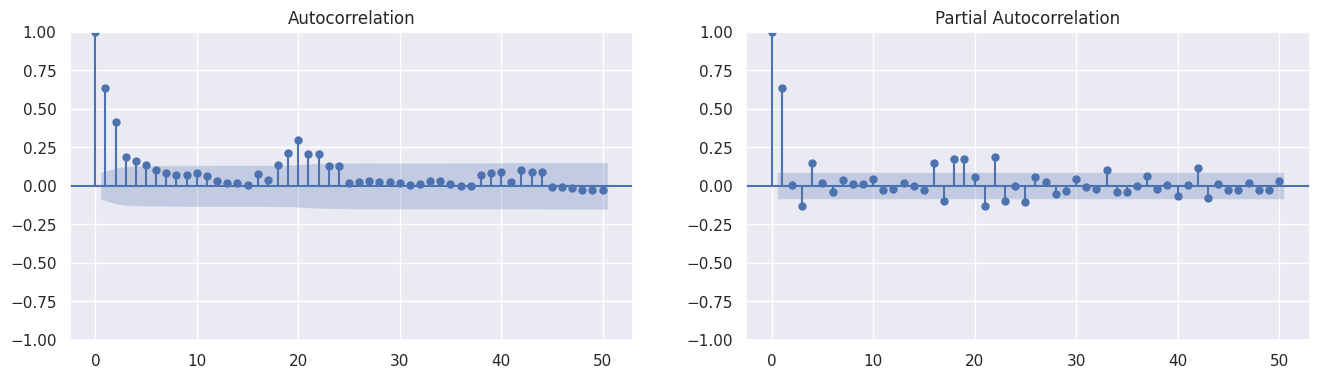

In [429]:
fig, axes = plt.subplots(1,2,figsize=(16,4), dpi= 100)
plot_acf(df['Всего'], lags=50, ax=axes[0])
plot_pacf(df['Всего'], lags=50, ax=axes[1])
plt.show()

Обучающая выборка: данные до июля 2023.

In [430]:
df['Дата'] = df.index
train = df[df['Дата'] < "2023-07"]
del train['Дата']
train = train.rename(columns={'Всего': 'train'})
train

,train
Дата,
2023-06-30,865533.26
2023-06-29,772232.57
2023-06-28,457657.78
2023-06-27,507903.88
2023-06-26,457888.77
...,...
2021-10-13,724374.94
2021-10-12,674935.36
2021-10-11,435008.95


Тестовая выборка: данные после июля 2023 включительно.

In [431]:
test = df[df['Дата'] >= "2023-07"]
del test['Дата']
test = test.rename(columns={'Всего': 'test'})
test

,test
Дата,
2023-10-16,7411164.50
2023-10-13,7479860.57
2023-10-12,7317256.87
2023-10-11,1204392.68
2023-10-10,1159347.51
...,...
2023-07-07,805232.57
2023-07-06,875171.78
2023-07-05,815788.99


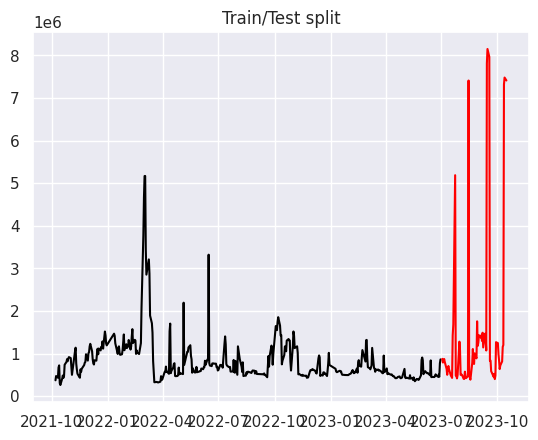

In [432]:
plt.plot(train, color = "black") #обучающая выборка
plt.plot(test, color = "red") #тестовая выборка
plt.title("Train/Test split")
sns.set()
plt.show()

In [433]:
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
print(test.index)
forecast = pd.DataFrame(forecast,index=test.index,columns=['Prediction'])
print(forecast)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11873.136, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11892.485, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11887.429, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11886.718, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11890.492, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11872.113, Time=0.48 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11887.986, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11870.961, Time=0.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11871.981, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11888.353, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.27 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 2.761 seconds
DatetimeIndex(['2023-10-16', '2023-10-13', '2023-10-12', '2023-10-11',
               '2023-10-10', '2023-10-09', '2023-10-06', '2023-10-05',
       

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


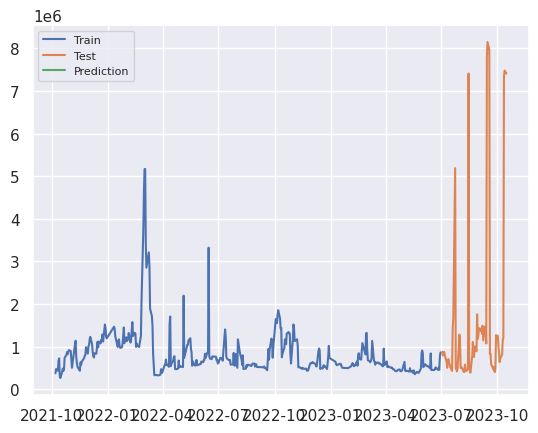

In [434]:
plt.plot(train, label='Train') #обучающая выборка
plt.plot(test, label='Test') #тестовая выборка
plt.plot(forecast, label='Prediction') #предсказанные значения
plt.legend(loc='upper left', fontsize=8)

plt.autoscale()
plt.show()

In [435]:
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)

In [436]:
from statsmodels.tsa.arima.model import ARIMA
model  =  ARIMA(df['Всего'], order=(1, 1, 1))
res = model.fit()
print(res.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:                  Всего   No. Observations:                  500
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7431.463
Date:                Thu, 08 Feb 2024   AIC                          14868.925
Time:                        18:41:19   BIC                          14881.563
Sample:                             0   HQIC                         14873.885
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6104      0.015     41.694      0.000       0.582       0.639
ma.L1         -0.9705      0.012    -77.803      0.000      -0.995      -0.946
sigma2      5.102e+11   1.34e-14   3.82e+25      0.0

<Axes: >

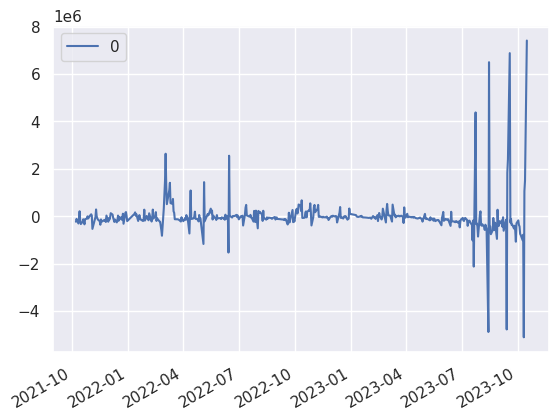

In [437]:
# визуализация остатков
residuals = pd.DataFrame(res.resid)
residuals.plot()